# Prueba Técnica BanPAY [Python] 

Este es un notebook de [Google Colab](https://www.youtube.com/watch?v=inN8seMm7UI). Google Colab está basado en el proyecto [Jupyter](https://jupyter.org/index.html).

Por favor, crea una copia de este Notebook a tu Google Drive y resuelve ahí los ejercicios. Una vez finalizados, por favor comparte en enlace a la siguiente dirección de [correo electrónico](mailto:alan.teran@banpay.com). No olvides poner el Notebook como público para que podamos acceder.

### 1. Imprime The Zen of Python



In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### 2. Usando la [API de Google Sheets](https://developers.google.com/sheets/api), obtén los datos de la siguiente [tabla](https://docs.google.com/spreadsheets/d/1G5darnYfuJvfPvaGZR9Y3cItm3wMbCQQ5DpZDkB7GQ0/edit?usp=sharing)

Debido a que necesitas proporcionar una llave privada para la conexión con la API, al momento de entregar el ejercicio, deberás reemplazar tu llave privada por la palabra "private_key".

In [2]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

creds = ServiceAccountCredentials.from_json_keyfile_name('token.json', scope)

client = gspread.authorize(creds)

sheet = client.open('datasample_airports')

sheet_instance = sheet.get_worksheet(0)

records_data = sheet_instance.get_all_records()

records_df = pd.DataFrame.from_dict(records_data)

records_df = records_df.drop(['id'], axis=1)
records_df.head()

,Airport Name,City,Country,IATA Code,ICAO Code,Latitude,Longitude,Altitude,UTC TimeZone,DST,Continent/State
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby


### 3. Utilizando el algoritmo de ordenamiento de tu preferencia, ordena los elemenentos de manera alfabética de acuerdo al Country

Este será el único ejercicio en el que se requirá la implementación manual de un algoritmo, para el resto de ejercicios puedes usar librerías

In [3]:
country_list = records_df['Country'].unique()
country_list = country_list.tolist()

In [4]:
def check_order(list_name):
  order_flag = False
  i = 0
  num = len(list_name)
  for element in list_name:
    if i < num - 1:
      if element < list_name[i + 1]:
        pass
      else:
        break
      i += 1
    else:
      order_flag = True
      
  return order_flag

In [5]:
import random

def quick_sort(list_name):
  empty = False
  if "" in list_name:
    list_name.remove("")
    empty = True
  else:
    pass
  if len(list_name) <= 1:
    return list_name
  else:
    start = 0  
    end = len(list_name) - 1
    mid_value = random.randint(start, end)
    mid_element = list_name[mid_value]
    list_name.remove(mid_element)
    upper_half = []
    lower_half = []
    for element in list_name:
      if element < mid_element:
        upper_half.append(element)
      else:
        lower_half.append(element)
  
  if empty == True:
    return quick_sort(upper_half) + [mid_element] + quick_sort(lower_half) + [""]
  else:
    return quick_sort(upper_half) + [mid_element] + quick_sort(lower_half)

In [6]:
ordered_list = quick_sort(country_list)

In [7]:
list_of_data = []
for country in ordered_list:
  cols = records_df.columns 
  sub_df = records_df[records_df['Country'].isin([country])]
  list_of_data.append(sub_df)

ordered_df = pd.concat(list_of_data)
ordered_df

,Airport Name,City,Country,IATA Code,ICAO Code,Latitude,Longitude,Altitude,UTC TimeZone,DST,Continent/State
1978,Herat Airport,Herat,Afghanistan,HEA,OAHR,34.209999,62.228298,3206,4.5,U,Asia/Kabul
1979,Jalalabad Airport,Jalalabad,Afghanistan,JAA,OAJL,34.399799,70.498596,1814,4.5,U,Asia/Kabul
1980,Hamid Karzai International Airport,Kabul,Afghanistan,KBL,OAKB,34.565899,69.212303,5877,4.5,U,Asia/Kabul
1981,Kandahar Airport,Kandahar,Afghanistan,KDH,OAKN,31.505800,65.847801,3337,4.5,U,Asia/Kabul
1982,Maimana Airport,Maimama,Afghanistan,MMZ,OAMN,35.930801,64.760902,2743,4.5,U,Asia/Kabul
...,...,...,...,...,...,...,...,...,...,...,...
5215,Spray View Airport,Spray View,Zimbabwe,\N,FVSV,-17.917000,25.816999,3210,2,U,Africa/Harare
6508,Bumi Airport,Bumi Hills,Zimbabwe,BZH,FVBM,-16.816999,28.350000,1650,2,N,Africa/Harare
6746,Mana Pools Airport,Mana Pools,Zimbabwe,\N,FVMN,-15.768735,29.385617,1300,2,N,\N
7362,Hwange (Town) Airport,Hwange,Zimbabwe,WKI,FVWT,-18.362967,26.519791,2500,2,N,\N


**En este cuadro de texto, menciona el algoritmo que seleccionaste y describe porqué lo elegiste: **

-> Utilicé el algoritmo de quick sort, porque considero que este algoritmo es más eficiente, en términos de tiempo y de uso de memoria, en este caso de ordenación alfabética que otros algoritmos como selection sort y bubble sort. Además de que es relativamente fácil de implementar.

### 4. Realiza un sistema de clases para el manejo de los datos para los siguientes ejercicios, todos los atributos deben de ser privados.

Debes de considerar un atributo en el que, usando las coordenadas, se determine si el aeropuerto se encuentra en el hemisferio Norte o Sur.

In [8]:
class Airport:
  def __init__(self, data):
    self.__data = data
    self.__latitude = self.__data.iloc[0]['Latitude']

  def get_hemisphere(self):
    if self.__latitude > 0:
      self.__hemisphere  = 'North Hemisphere'
    elif self.__latitude == 0:
      self.__hemisphere = 'It is located on the equator'
    else:
      self.__hemisphere = 'South Hemisphere'
    return self.__hemisphere

In [9]:
query = ordered_df.loc[ordered_df['Airport Name'] == 'Bumi Airport']
query1 = ordered_df.loc[ordered_df['Airport Name'] == 'Herat Airport']

hemisphere = Airport(query)
print(hemisphere.get_hemisphere())

hemisphere1 = Airport(query1)
print(hemisphere1.get_hemisphere())

South Hemisphere
North Hemisphere


### 5. Obtén todos los aeropuertos de Estados Unidos en forma de lista de diccionarios y excluye a todos aquellos que tengan como valor "null" en City. Ordenálos de manera alfabética descendente de acuerdo al Airport Name, imprime el resultado y exporta los valores en formato CSV

In [10]:
class Airport:
  def __init__(self, data, country):
    self.__data = data
    self.__country = country
  
  def get_data(self):
    self.__countrydata = self.__data.loc[self.__data['Country'] == self.__country]
    self.__subset = self.__countrydata.dropna(subset = ['City'])
    self.__subset_ord = self.__subset.sort_values(by = ['Airport Name'], ascending = False)
    return self.__subset_ord.T.to_dict().values()
  
  def create_csv(self):
    self.__subset_ord.to_csv('data.csv',index=False)

In [11]:
test = Airport(ordered_df, 'United States')
print(test.get_data())
test.create_csv()

dict_values([{'Airport Name': 'Zephyrhills Municipal Airport', 'City': 'Zephyrhills', 'Country': 'United States', 'IATA Code': 'ZPH', 'ICAO Code': 'KZPH', 'Latitude': 28.2282009, 'Longitude': -82.155899, 'Altitude': 90, 'UTC TimeZone': -5, 'DST': 'A', 'Continent/State': 'America/New_York'}, {'Airport Name': 'Zelienople Municipal Airport', 'City': 'Zelienople', 'Country': 'United States', 'IATA Code': '\\N', 'ICAO Code': 'KPJC', 'Latitude': 40.8016014, 'Longitude': -80.1606979, 'Altitude': 898, 'UTC TimeZone': -5, 'DST': 'A', 'Continent/State': 'America/New_York'}, {'Airport Name': 'Zanesville Municipal Airport', 'City': 'Zanesville', 'Country': 'United States', 'IATA Code': 'ZZV', 'ICAO Code': 'KZZV', 'Latitude': 39.9444008, 'Longitude': -81.8920975, 'Altitude': 900, 'UTC TimeZone': '\\N', 'DST': '\\N', 'Continent/State': '\\N'}, {'Airport Name': 'Zamperini Field', 'City': 'Torrance', 'Country': 'United States', 'IATA Code': 'TOA', 'ICAO Code': 'KTOA', 'Latitude': 33.8033981, 'Longitud

### 6. Obten los aeropuertos con el código ICAO "MMMX" y "MMQT", dadas sus coordenadas, determina la distancia lineal entre esos dos aeropuertos. Es requisito usar expresiones `Lambda` algun punto del ejercicio

In [12]:
from math import radians, cos, sin, asin, sqrt

class Airport:
  def __init__(self, data, code1, code2):
    self.__data = data
    self.__code1 = code1
    self.__code2 = code2
  
  def get_data(self):
    self.__query = self.__data.loc[(self.__data['ICAO Code'] == self.__code1) | (self.__data['ICAO Code'] == self.__code2)]
    self.__query['Latitude'] = self.__data.apply(lambda x: radians(x['Latitude']), axis = 1)
    self.__query['Longitude'] = self.__data.apply(lambda x: radians(x['Longitude']), axis = 1)
    self.__latitude1 = self.__query.iloc[0]['Latitude']
    self.__latitude2 = self.__query.iloc[1]['Latitude']
    self.__longitude1 = self.__query.iloc[0]['Longitude']
    self.__longitude2 = self.__query.iloc[1]['Longitude']
    self.__dif_latitude = self.__latitude2 - self.__latitude1
    self.__dif_longitude = self.__longitude2 - self.__longitude1
    self.__a = sin(self.__dif_latitude / 2) ** 2 + cos(self.__latitude1) * cos(self.__latitude2) * sin(self.__dif_longitude / 2) ** 2
    self.__c = 2 * asin(sqrt(self.__a))
    self.__r = 6371
    return (self.__c * self.__r)

In [13]:
test = Airport(ordered_df, 'MMMX', 'MMQT')
test.get_data()

C:\Users\josfr\AppData\Local\Temp/ipykernel_9336/1664146444.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__query['Latitude'] = self.__data.apply(lambda x: radians(x['Latitude']), axis = 1)
C:\Users\josfr\AppData\Local\Temp/ipykernel_9336/1664146444.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__query['Longitude'] = self.__data.apply(lambda x: radians(x['Longitude']), axis = 1)


175.461148008754

### 7. Usando la API de de [RestCountries](https://restcountries.eu/), imprime el código alpha de los países con los 10 aeropuertos con mayor altitud y muestra sus respectivas banderas usando [CountryFlags](https://www.countryflags.io/). Comprueba que los valores de las latitudes y longitudes sean correctas usando expresiones regulares

In [14]:
import requests
import json
import numpy as np
import urllib
import cv2
import urllib.request

from PIL import Image
from io import BytesIO

class Airport:
  def __init__(self, data):
    self.__data = data 
  
  def get_data(self):
    self.__top = self.__data.nlargest(10, 'Altitude')
    self.__uniques = self.__top['Country'].unique()
    self.__uniques = self.__uniques.tolist()
    self.__user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    self.__headers={'User-Agent':self.__user_agent,}
    self.__codes = []
    self.__flags = []
    for country in self.__uniques:
       r = requests.get("https://restcountries.eu/rest/v2/name/" + country)
       json_data = json.loads(r.text)
       self.__code = json_data[0]['alpha2Code']
       self.__codes.append(self.__code)
       url = "https://www.countryflags.io/" + self.__code + "/flat/64.png"
       request=urllib.request.Request(url,None,self.__headers)
       response = urllib.request.urlopen(request)
       data = response.read()
       img = Image.open(BytesIO(data))
       self.__flags.append(img)
    
    return self.__codes, self.__flags

In [15]:
test = Airport(ordered_df)
names, images = test.get_data()

In [16]:
names[0]

'CN'

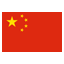

In [17]:
images[0]

In [18]:
names[1]

'BO'

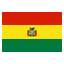

In [19]:
images[1]

In [20]:
names[2]

'PE'

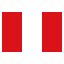

In [21]:
images[2]

### 8. Utilizando la API de [RestCountries](https://restcountries.eu/), agrega todos los nombres nativos (`nativeName`) de todos los países que tengan aeropuertos en Asia y exporta los datos en un archivo excel



In [22]:
import requests
import json
import numpy as np
import urllib
import urllib.request


class Airport:
  def __init__(self, data):
    self.__data = data 
  
  def get_data(self):
    self.__country_list = self.__data['Country'].unique()
    self.__uniques = self.__data['Country'].unique()
    self.__uniques = self.__uniques.tolist()
    self.__nativename = {}
    for country in self.__uniques:
      if country == "":
        pass
      elif country == "North Korea":
        r = requests.get("https://restcountries.eu/rest/v2/name/People's Republic of Korea")
        json_data = json.loads(r.text)
        self.__nativename[country] = json_data[0]['nativeName']
      elif country == "South Korea":
        r = requests.get("https://restcountries.eu/rest/v2/name/Republic of Korea")
        json_data = json.loads(r.text)
        self.__nativename[country] = json_data[0]['nativeName']
      else:
        r = requests.get("https://restcountries.eu/rest/v2/name/" + country)
        json_data = json.loads(r.text)
        if 'message' in json_data:
          pass
        else:
          self.__region = json_data[0]['region']
          if self.__region == 'Asia':
            self.__nativename[country] = json_data[0]['nativeName']
          else:
            pass

    return self.__nativename

  def create_excel(self):
    self.__list_out = []
    for key,value in self.__nativename.items():
      self.__sub_df = self.__data.loc[(self.__data['Country'] == key)]
      self.__sub_df['Native Name'] = value
      self.__list_out.append(self.__sub_df)
    
    self.__output = pd.concat(self.__list_out)  
    self.__output.to_excel("output.xlsx", index = False)

In [24]:
test = Airport(ordered_df)
native = test.get_data()
out = test.create_excel()

C:\Users\josfr\AppData\Local\Temp/ipykernel_9336/1388506153.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__sub_df['Native Name'] = value


### 9. Utilizando Django y sin realizar conexión a base de datos, genera una página o API en la que se puedan consultar los datos de la tabla original más los obtenidos en el ejercicio anterior. 


Agrega en enlace al repositorio git en este cuadro de texto

->